In [182]:
#import modules for the analysis environment
import os
import matplotlib.pyplot as plta
import pandas as pd
import numpy as np
import requests
import datetime
import ast
import gmaps
import datetime
# from config import gkey

#read cleaned csv file
df = pd.read_csv("Data/clean_data/clean_data.csv")
df.head()

,date,time,area,district,victim_age,victim_sex,victim_race,premise,address,location
0,07/06/2019,2355,N Hollywood,1591,99.0,Male,Unknown,STREET,GOODLAND AV,"(34.1371, -118.4062)"
1,07/06/2019,500,Foothill,1677,45.0,Male,White,STREET,GLENOAKS BL,"(34.2249, -118.3617)"
2,07/06/2019,1130,West Valley,1028,25.0,Male,Asian,STREET,SHERMAN WY,"(34.2012, -118.4989)"
3,07/06/2019,1415,Northeast,1153,29.0,Male,Unknown,STREET,LOS FELIZ BL,"(34.1081, -118.3078)"
4,07/06/2019,1230,Central,192,41.0,Male,Unknown,STREET,GRAND AV,"(34.0384, -118.2646)"


In [183]:
# Create DataFrame with the total counts of each ethnicity
victim_race_counts = pd.DataFrame(df['victim_race'].value_counts())
victim_race_counts

,victim_race
Hispanic,156131
White,101618
Unknown,60669
Black,58343
Asian,23383
Pacific Islander,442
American Indian,135


In [194]:
# Remove Unknown victims from DataFrame
updated_victim_race = victim_race_counts.loc[['Hispanic','White','Black',
                                              'Asian','Pacific Islander','American Indian'],
                                             ['victim_race']]
updated_victim_race

,victim_race
Hispanic,156131
White,101618
Black,58343
Asian,23383
Pacific Islander,442
American Indian,135


In [198]:
#Calculate the percentage of total crashes per ethinicity 
percent_victim_race = updated_victim_race["victim_race"]/updated_victim_race["victim_race"].sum()*100

# Add a new colum display the calculated percentage
updated_victim_race["percentage"] = percent_victim_race
updated_victim_race

,victim_race,percentage
Hispanic,156131,45.913860
White,101618,29.883077
Black,58343,17.157082
Asian,23383,6.876301
Pacific Islander,442,0.129980
American Indian,135,0.039700


In [136]:
### TO BE REMOVE == JUST TO SEE COMPARATION B4 AND AFTER UNKOWN
# Display only the percentage of crashes per ethnicity
victim_race_percentage = pd.DataFrame(victim_race_counts["percentage"])
victim_race_percentage

,percentage
Hispanic,38.96
White,25.36
Unknown,15.14
Black,14.56
Asian,5.84
Pacific Islander,0.11
American Indian,0.03


In [206]:
# Display only the percentage of crashes per ethnicity
pct_race_df = pd.DataFrame(updated_victim_race["percentage"])

# Format percentage calculations with two digits and percentage sign
pct_race_df.style.format({"percentage":"{:,.2f}%"})

,percentage
Hispanic,45.91%
White,29.88%
Black,17.16%
Asian,6.88%
Pacific Islander,0.13%
American Indian,0.04%


TypeError: 'AxesSubplot' object is not iterable

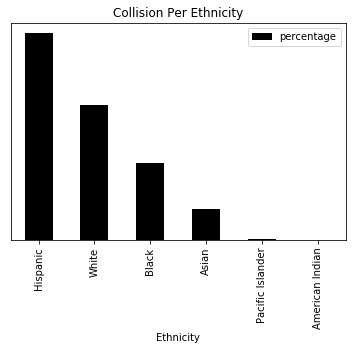

In [216]:
# Plot graph bar
fig = pct_race_df.plot(kind="bar", color="black")
fig.set_title("Collision Per Ethnicity")
fig.set_xlabel("Ethnicity")
fig.set_yticks([])

# Use functions to label the percentages of changes
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            label_position = 1
        else:
            label_position = -7
        plt.text(bar.get_x() + bar.get_width()/2., 
                 label_position,
                 "%d" % int(height)+"%",
                 color='white',
                 ha="center",va="bottom")

# Call functions to implement the function calls
autolabel(fig)


Text(0.5, 0, 'Ethnicity')

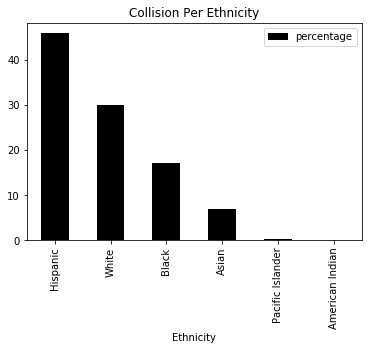

In [212]:
# Plot graph bar
fig = pct_race_df.plot(kind="bar", color="black")
fig.set_title("Collision Per Ethnicity")
fig.set_xlabel("Ethnicity")
# fig.set_yticks([])
fig.tick_params(axis="x", )
# # Use functions to label the percentages of changes
# def autolabel(bars):
#     for bar in bars:
#         height = bar.get_height()
#         if height > 0:
#             label_position = 1
#         else:
#             label_position = -7
#         plt.text(bar.get_x() + bar.get_width()/2., 
#                  label_position,
#                  "%d" % int(height)+"%",
#                  color='white',
#                  ha="center",va="bottom")

# # Call functions to implement the function calls
# autolabel(fig)



In [116]:
unknown = test2.loc["Unknown", "victim_race"]
print(unknown)
average = unknown/test2["victim_race"].sum()
average

60669


0.15139960221700385

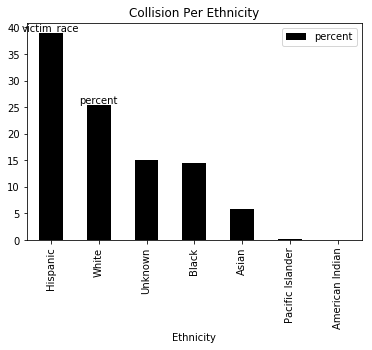

In [96]:
pct_df = pd.DataFrame(test2["percent"])
fig = pct_df.plot(kind="bar", color="black")
fig.set_xlabel('Ethnicity')
fig.set_title('Collision Per Ethnicity')
labels=pct_df.percent.tolist()
rects = fig.patches
for rect,label in zip(rects,test2):
    fig.text(rect.get_x()+rect.get_width()/2, rect.get_height(),label,ha="center",va="bottom")

In [ ]:
#get an overview of victim in race distribution
# pct_df["percent"].value_counts()
#bar graph
race_data = pd.DataFrame(df["percent"].value_counts())
fig = pct_df.plot(kind="bar", color="black")
fig.set_xlabel('Ethnicity')
fig.set_title('Collision Per Ethnicity')
labels=race_data.victim_race.tolist()
sum_labels = sum(labels)
perc_labels = [round(i/sum_labels*100,2) for i in labels]
perc_labels = ['{:,.2f}%'.format(i) for i in perc_labels]

In [80]:
pct_df = pd.DataFrame(test2["percent"])
pd.DataFrame(test2["percent"]).style.format({"percent" : ",.2f}%"})

ValueError: Single '}' encountered in format string

In [75]:
pct_df = pd.DataFrame(test2["percent"].value_counts())
pct_df.style.format({"percent" : ",.2f}%"})

AttributeError: 'Series' object has no attribute 'style'

In [ ]:
#get an overview of victim in race distribution
test2["percent"].value_counts()
#bar graph
race_data = pd.DataFrame(df["percent"].value_counts())
fig = race_data.plot(kind="bar", color="black")
fig.set_xlabel('Ethnicity')
fig.set_title('Collision Per Ethnicity')
labels=race_data.victim_race.tolist()
sum_labels = sum(labels)
perc_labels = [round(i/sum_labels*100,2) for i in labels]
perc_labels = ['{:,.2f}%'.format(i) for i in perc_labels]


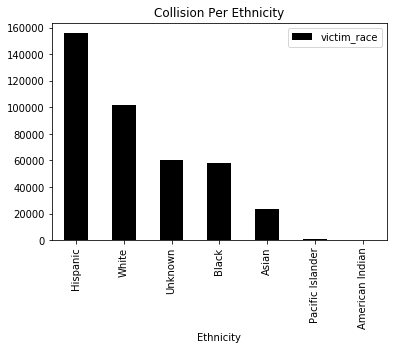

In [89]:
#get an overview of victim in race distribution
df["victim_race"].value_counts()
#bar graph
race_data = pd.DataFrame(df["victim_race"].value_counts())
fig = race_data.plot(kind="bar", color="black")
fig.set_xlabel('Ethnicity')
fig.set_title('Collision Per Ethnicity')
labels=race_data.victim_race.tolist()
sum_labels = sum(labels)
perc_labels = [round(i/sum_labels*100,2) for i in labels]
perc_labels = ['{:,.2f}%'.format(i) for i in perc_labels]


## Do Asian Crash More Than Average?

Text(0.5, 1.0, 'Collision Per Ethnicity')

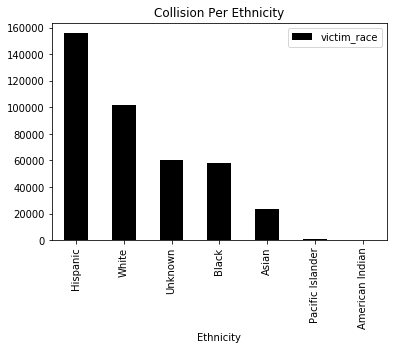

In [6]:
#get an overview of victim in race distribution
df["victim_race"].value_counts()
#bar graph
race_data = pd.DataFrame(df["victim_race"].value_counts())
fig = race_data.plot(kind="bar", color="black")
fig.set_xlabel('Ethnicity')
fig.set_title('Collision Per Ethnicity')
labels=race_data.victim_race.tolist()
sum_labels = sum(labels)
perc_labels = [round(i/sum_labels*100,2) for i in labels]
perc_labels = ['{:,.2f}%'.format(i) for i in perc_labels]


## How Many Car Accidents Per Month?

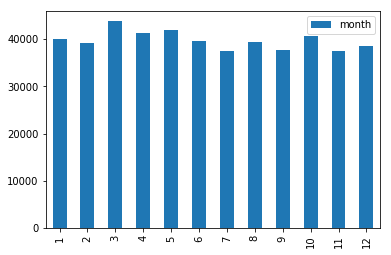

In [162]:
df1= df.copy()
# #map the month column to make it look neat
month_description = {1:'January', 2:'February', 3:'Unknown',4:'April', 5:'May', 6:'June',
                      7:'July', 8:'August', 9:'September',10:'October', 11:'November', 12:'December'}
df1.month = df.month.map(month_description)
df1.head()

month_data = pd.DataFrame(df.month.value_counts())
month_data= month_data.sort_index()
fig_month = month_data.plot(kind='bar')

## Calendar Heatmap

## Google Heatmap

In [86]:
!pip install gmaps

In [92]:
# gmaps.configure(api_key=gkey)
# location = df[['lat','lon']].astype(float)
# fig = gmaps.figure()

# layer = gmaps.symbol_layer(
#     location, fill_color='rgba(0, 150, 0, 0.4)',
#     stroke_color='rgba(0, 0, 150, 0.4)', scale=2)

# fig.add_layer(layer)
# fig

Figure(layout=FigureLayout(height='420px'))